# Kernel PCA

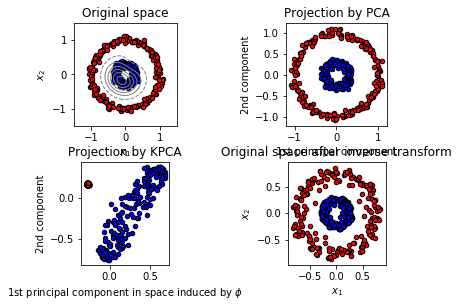

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(10)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

In [23]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


## Classification using SVM

In [24]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from time import time
# #############################################################################
# Train a SVM classification model
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set
done in 0.468s


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.001s
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


Text(0.5,1,'Classification after SVM')

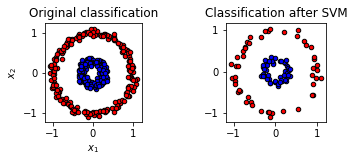

In [28]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after SVM")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")

## Clasification using RVM

In [29]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)#, random_state=39)

In [30]:
#use -1 and 1

In [31]:
from skrvm import RVR
# from skrvm import RVC
# #############################################################################
# Train a RVM classification model
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# clf = GridSearchCV(RVR(kernel='rbf'), param_grid)
clf = RVR(kernel='rbf')
clf.fit(X_train, y_train)
RVR(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
coef1=None, degree=3, kernel='rbf', n_iter=3000,
threshold_alpha=1000000000.0, tol=0.001, verbose=False)
print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 0.252s


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

count = 0
for values in y_pred:
    if y_pred[count] >=1:
        y_pred[count] = 1
        count = count+1
    else:
        y_pred[count] = 0
        count = count+1
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.001s
             precision    recall  f1-score   support

          0       0.66      1.00      0.79        50
          1       1.00      0.48      0.65        50

avg / total       0.83      0.74      0.72       100

[[50  0]
 [26 24]]


Text(0.5,1,'Classification after RVM')

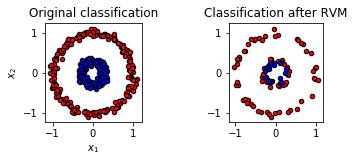

In [33]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after RVM")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")

## Classification using Gaussian Process

In [34]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)

In [35]:
from sklearn.gaussian_process import GaussianProcessRegressor
# #############################################################################
# Train a GPR classification model
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# clf = GridSearchCV(GaussianProcessRegressor(), param_grid)
clf = GaussianProcessRegressor() # Uses RBF as default
clf.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 0.017s


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

count = 0
for values in y_pred:
    if y_pred[count] >=1:
        y_pred[count] = 1
        count = count+1
    else:
        y_pred[count] = 0
        count = count+1
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.002s
             precision    recall  f1-score   support

          0       0.76      1.00      0.86        50
          1       1.00      0.68      0.81        50

avg / total       0.88      0.84      0.84       100

[[50  0]
 [16 34]]


Text(0.5,1,'Classification after GPR')

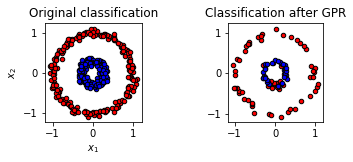

In [37]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after GPR")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")

In [38]:
###########################################
#### Sources ##############################
# Example of different kernels using SVM ##
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

# Example eigenfaces for SVM ##############
# http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

# Example of digits #######################
# http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

# RVM Repository ##########################
# https://github.com/JamesRitchie/scikit-rvm

# Cross Validation #######################
# http://scikit-learn.org/stable/modules/cross_validation.html

# SVM and Gaussian Process
# http://scikit-learn.org/stable/modules/svm.html
# http://scikit-learn.org/stable/modules/gaussian_process.html

## Exploration of Data

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os

# Load image data
data_load_1 = sio.loadmat('Proj2FeatVecsSet1.mat')
data_load_2 = sio.loadmat('Proj2TargetOutputsSet1.mat')
data_set = data_load_1['Proj2FeatVecsSet1']
data_target = data_load_2['Proj2TargetOutputsSet1']

print(data_set.shape)
print(data_target.shape)

(25000, 60)
(25000, 5)


In [29]:
# Divide my target data into nice 1-D classifier
number_labels = []
for ars in data_target:
    if np.all(ars == [1,-1,-1,-1,-1]):
        ars = 1
        number_labels.append(ars)
    elif np.all(ars == [-1,1,-1,-1,-1]):
        ars = 2
        number_labels.append(ars)
    elif np.all(ars == [-1,-1,1,-1,-1]):
        ars = 3
        number_labels.append(ars)
    elif np.all(ars == [-1,-1,-1,1,-1]):
        ars = 4
        number_labels.append(ars)
    elif np.all(ars == [-1,-1,-1,-1,1]):
        ars = 5
        number_labels.append(ars)
        
number_labels = np.asarray(number_labels)

## Define how many components we should use and run PCA

We need about 9 components to retain 95% of the variance


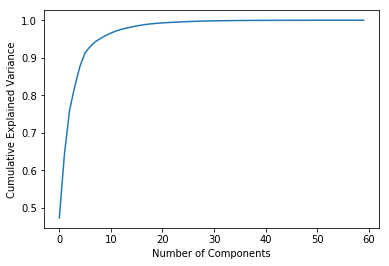

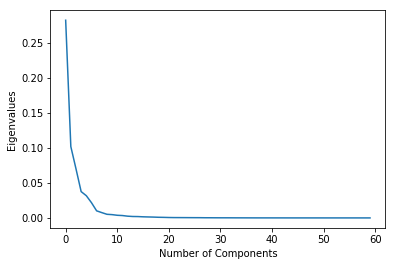

In [30]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_set)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

# Minumum Noise Factor --> Similar to PCA but removes noise from bands

In [31]:
from sklearn.decomposition import PCA
from skimage.transform import rescale
from sklearn.cluster import KMeans
import numpy as np
import time

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data_set)
reduced_data.shape

(25000, 9)

## Creation of Data Folds - Training and Testing

In [32]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    reduced_data, number_labels, test_size=0.20, stratify = number_labels)#, random_state=39)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 9)
(5000, 9)
(20000,)
(5000,)


## SVM

In [15]:
from sklearn.svm import SVC
from time import time
# #############################################################################
# Train a SVM classification model
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 1e4, 1e5],
#               'gamma': [0.001, 0.01, 0.1] }
# clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = SVC(kernel='rbf', class_weight='balanced')#, gamma = 1)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 6.415s


0.9317

In [11]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 1.828s
             precision    recall  f1-score   support

          1       0.97      0.97      0.97      1000
          2       0.91      0.90      0.91      1000
          3       0.96      0.95      0.96      1000
          4       0.88      0.90      0.89      1000
          5       0.94      0.95      0.95      1000

avg / total       0.93      0.93      0.93      5000

[[971  15   6   1   7]
 [  9 898   5  86   2]
 [  7   1 950  10  32]
 [  4  66  11 902  17]
 [  8   2  15  26 949]]


## RVM

In [5]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    reduced_data, number_labels, test_size=0.20, stratify = number_labels)#, random_state=39)

In [8]:
# This is running very slow, why!?!?!?

# from skrvm import RVR
# # from skrvm import RVC
# # #############################################################################
# # Train a RVM classification model
# print("Fitting the classifier to the training set")
# t0 = time()
# # param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
# #               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# # clf = GridSearchCV(RVR(kernel='rbf'), param_grid)
# clf = RVR(kernel='rbf')
# clf.fit(X_train, y_train)
# # RVR(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
# # coef1=None, degree=3, kernel='rbf', n_iter=1000,
# # threshold_alpha=1000000000.0, tol=0.001, verbose=False)
# print("done in %0.3fs" % (time() - t0))
# # # clf.score(X_train, y_train)

In [7]:
# from skrvm import RVC
# # from sklearn.datasets import load_iris
# clf = RVC()
# clf.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# # #############################################################################
# # Quantitative evaluation of the model quality on the test set
# print("Predicting class on the test set")
# t0 = time()
# y_pred = clf.predict(X_test)
# print("done in %0.3fs" % (time() - t0))

# count = 0
# for values in y_pred:
#     if y_pred[count] >=1:
#         y_pred[count] = 1
#         count = count+1
#     else:
#         y_pred[count] = 0
#         count = count+1
        
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

## Gaussian Process

In [6]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    reduced_data, data_target, test_size=0.20, stratify = data_target)#, random_state=39)

In [7]:
y_train

array([[-1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1],
       ...,
       [-1, -1, -1,  1, -1],
       [-1, -1, -1, -1,  1],
       [-1,  1, -1, -1, -1]], dtype=int16)

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from time import time
# #############################################################################
# Train a GPR classification model
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# clf = GridSearchCV(GaussianProcessRegressor(), param_grid)
# kernel = 1.0 * RBF(1.0)
clf = GaussianProcessRegressor()#kernel=kernel) # Uses RBF as default
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 182.428s


In [10]:
clf.score(X_train, y_train)

0.970015371922671

In [11]:
from sklearn.gaussian_process import GaussianProcessClassifier
# #############################################################################
# Train a GPR classification model
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# clf = GridSearchCV(GaussianProcessRegressor(), param_grid)
# kernel = 1.0 * RBF(1.0)
clf1 = GaussianProcessClassifier()#kernel=kernel) # Uses RBF as default
clf1.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set


ValueError: bad input shape (20000, 5)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
# count = 0
# for values in y_pred:
#     if y_pred[count] >=1:
#         y_pred[count] = 1
#         count = count+1
#     else:
#         y_pred[count] = 0
#         count = count+1
        
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 7.949s


In [15]:
# This is terrible!!!!
np.unique(y_pred[:200])

array([-2.00871675e+02, -2.00004507e+02, -1.64107848e+02, -1.39911011e+02,
       -6.92198341e+01, -5.70607975e+01, -4.63828937e+01, -4.03581082e+01,
       -2.38617014e+01, -1.67664278e+01, -1.57300242e+01, -1.53738751e+01,
       -1.40566235e+01, -1.33912456e+01, -1.17199571e+01, -1.15114608e+01,
       -1.04890485e+01, -9.63267422e+00, -8.84101820e+00, -8.69669950e+00,
       -8.40451384e+00, -7.47011495e+00, -7.02965689e+00, -7.01798630e+00,
       -6.95046616e+00, -6.19322824e+00, -6.08569145e+00, -5.48646903e+00,
       -5.15842199e+00, -5.15684581e+00, -5.09735537e+00, -5.00037289e+00,
       -4.64153862e+00, -4.58338118e+00, -4.54758835e+00, -4.54386079e+00,
       -4.41992784e+00, -3.93472481e+00, -3.90876150e+00, -3.68702674e+00,
       -3.57956696e+00, -3.46536827e+00, -3.30133832e+00, -3.20978260e+00,
       -3.12093222e+00, -2.99996853e+00, -2.83744192e+00, -2.80020857e+00,
       -2.77782726e+00, -2.72124338e+00, -2.55042934e+00, -2.50367737e+00,
       -2.47546577e+00, -

## Function TrainMyClassifier - I do not know what are the XEstimate,XValidate,Parameters, we need to look into this

In [22]:
# Not sure if this is the correct type of function we need
def TrainMyClassifier(XEstimate,XValidate,Parameters):
    from sklearn.svm import SVC
    from time import time
    # ################################################
    # Train a SVM classification model
    print("Fitting the classifier to the training set")
    t0 = time()
    # param_grid = {'C': [1e3, 1e4, 1e5],
    #               'gamma': [0.001, 0.01, 0.1] }
    # clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = SVC(kernel = Parameters[1], class_weight='balanced', gamma = Parameters[2], C = Parameters[3])
    clf = clf.fit(XEstimate, XValidate)
    print("done in %0.3fs" % (time() - t0))

In [33]:
# Not sure if this is the correct type of function we need
def TrainMyClassifier(XEstimate, XValidate, Parameters):
    from sklearn.svm import SVC
    from skrvm import RVR
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    from time import time
    t0 = time()
    if Parameters[0] == 'SVC':
        # ################################################
        # Train a SVM classification model
        print("Fitting the classifier to the training set")
        # param_grid = {'C': [1e3, 1e4, 1e5],
        #               'gamma': [0.001, 0.01, 0.1] }
        # clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
        clf = SVC(kernel = Parameters[1], class_weight='balanced', gamma = Parameters[2], C = Parameters[3])
        clf = clf.fit(XEstimate, XValidate)
        print("done in %0.3fs" % (time() - t0))
        
    elif Parameters[0] == 'RVM':
        print("Still working on it")
#         # #############################################################################
#         # Train a RVM classification model
#         print("Fitting the classifier to the training set")
#         t0 = time()
#         # param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#         #               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
#         # clf = GridSearchCV(RVR(kernel='rbf'), param_grid)
#         clf = RVR(kernel='rbf')
#         clf.fit(X_train, y_train)

    elif Parameters[0] == 'GPR':
        print("Still working on it")
#         # #############################################################################
#         # Train a GPR classification model
#         print("Fitting the classifier to the training set")
#         # clf = GridSearchCV(GaussianProcessRegressor(), param_grid)
#         # kernel = 1.0 * RBF(1.0)
#         clf1 = GaussianProcessClassifier()#kernel=kernel) # Uses RBF as default
#         clf1.fit(X_train, y_train)
#         print("done in %0.3fs" % (time() - t0))
    else:
        print("Incorrect type of algorithm, please use only one of the supported classifiers SVM, RVM, GPR")

In [36]:
# Kernel = 'rbf'
# Gamma = 1
# C = 1
Parameters = ['SVC','rbf',1,1]
XEstimate = X_train
XValidate = y_train
TrainMyClassifier(XEstimate,XValidate, Parameters)

Fitting the classifier to the training set
done in 4.738s
